<a href="https://colab.research.google.com/github/Chung-god/ComputerVision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.datasets import cifar10
import random
from google.colab.patches import cv2_imshow

In [39]:
#cifar10에서 데이터 로드 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [40]:
alist=[]
for i in range(100):
  a = random.randint(1,50000)
  while a in alist:
    a = random.randint(1,50000)
  alist.append(a)

print(alist)

[23734, 10036, 24457, 26816, 43328, 298, 37862, 31438, 25964, 11835, 15541, 31114, 48735, 18930, 49787, 18740, 41579, 15559, 37562, 29536, 31247, 12599, 18407, 30278, 13425, 40837, 43428, 35298, 15687, 21667, 38689, 22147, 45497, 34825, 33766, 19122, 16686, 7616, 44666, 8096, 25768, 38881, 37346, 33500, 18146, 403, 33476, 47656, 1641, 9005, 9738, 1032, 31765, 7686, 29237, 20939, 18354, 14176, 38443, 4255, 5709, 10531, 104, 33146, 7852, 43577, 18605, 46335, 29091, 5335, 24644, 12827, 21359, 25851, 4861, 47751, 34842, 22379, 11419, 10276, 4849, 33681, 24344, 16089, 2108, 45208, 19504, 38656, 44946, 42488, 13136, 44599, 12342, 7705, 15376, 16421, 7826, 1618, 38251, 31215]


In [41]:
#정규화
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

#원핫코드
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]



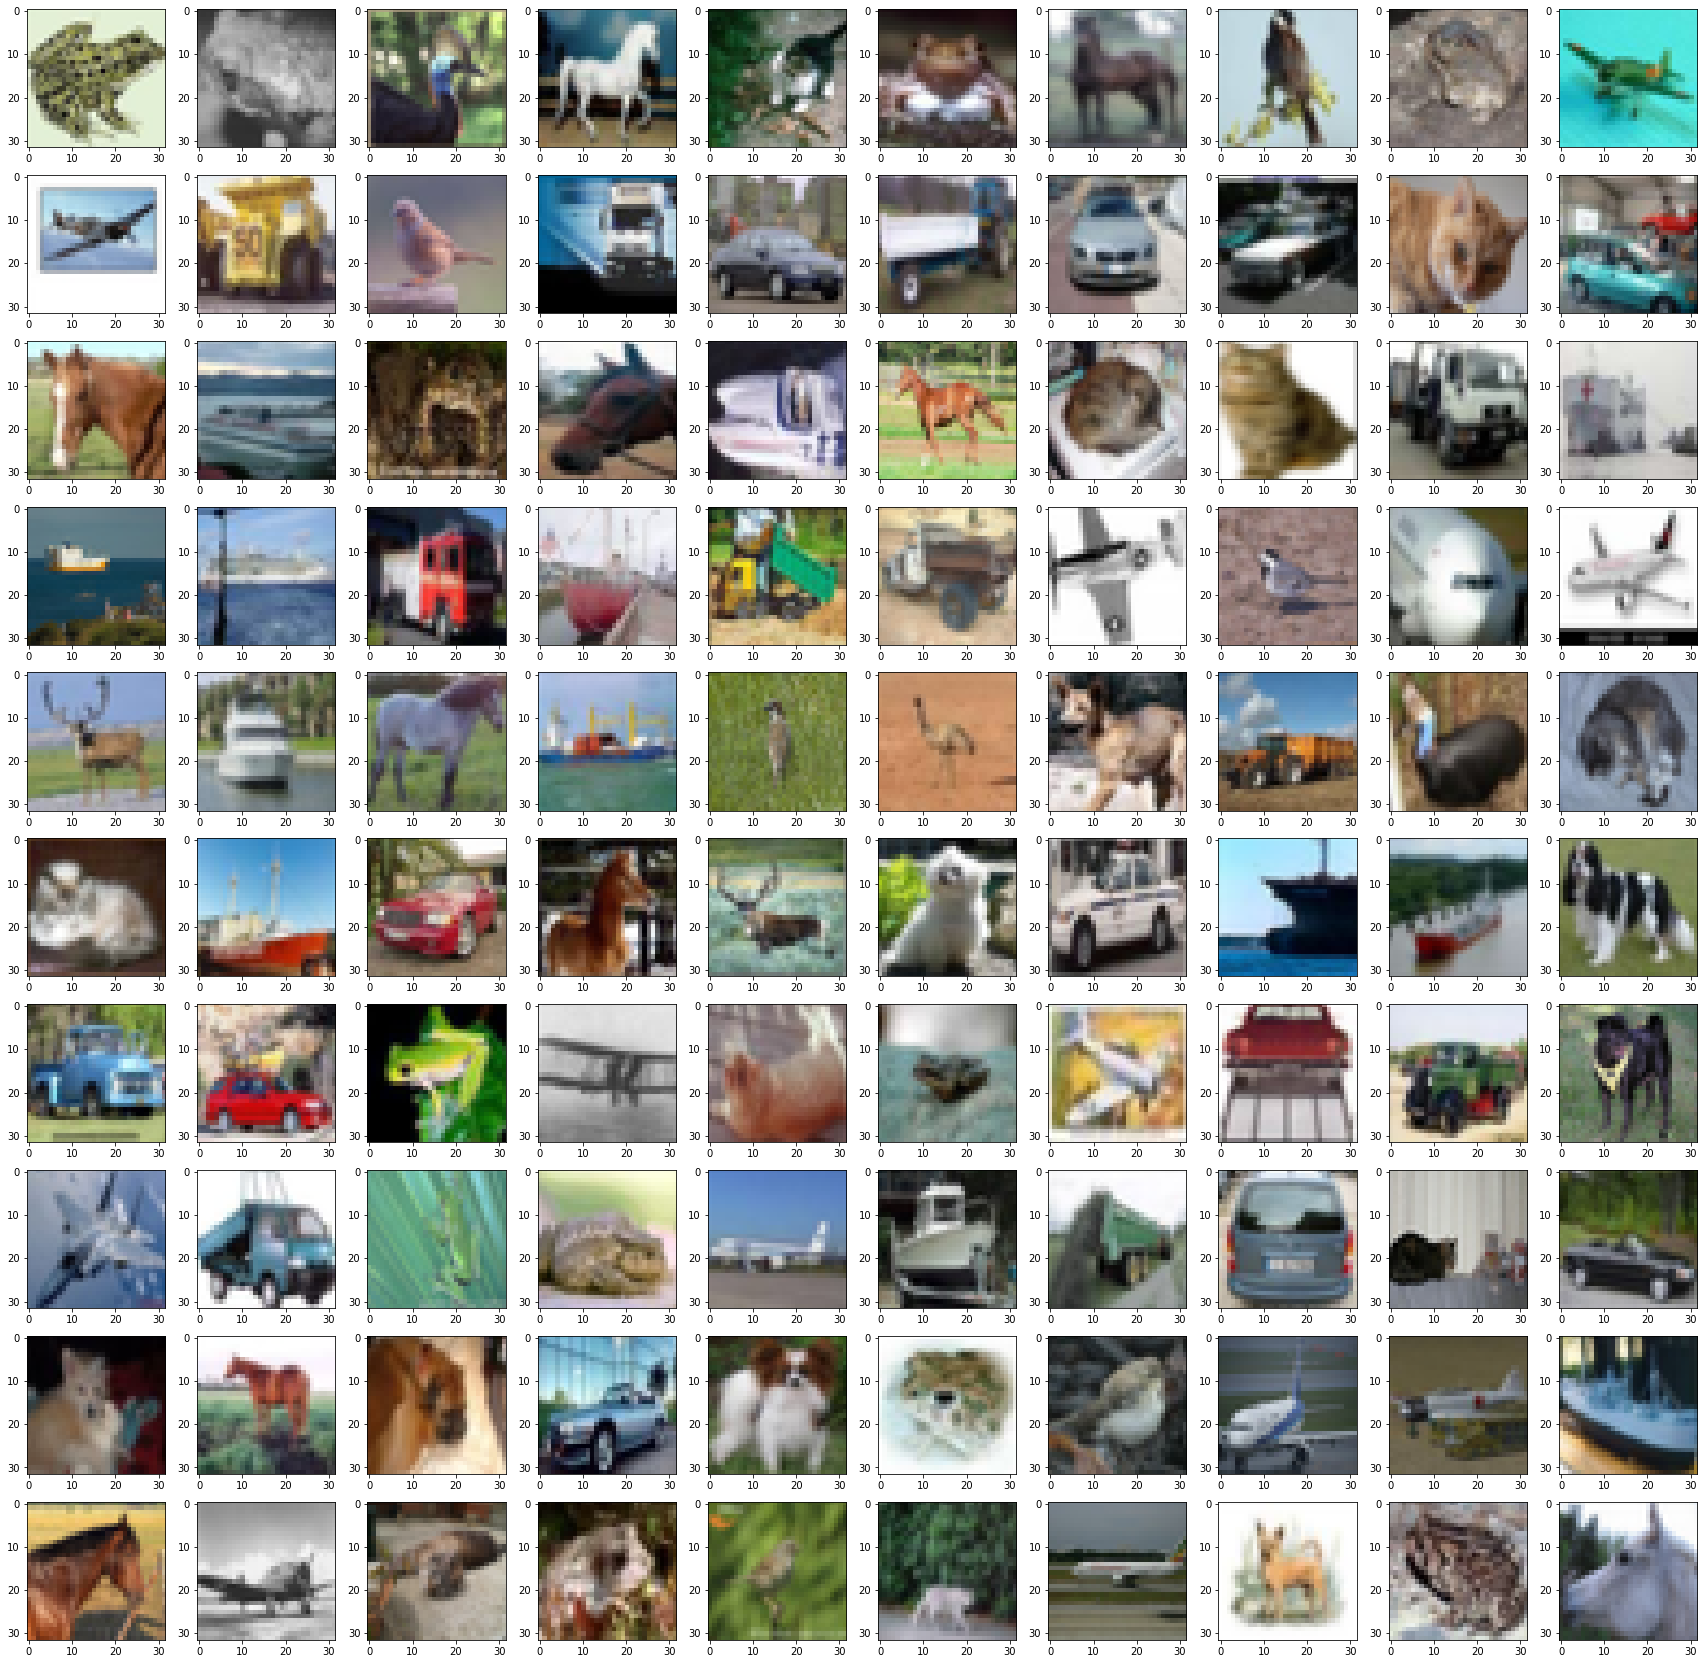

In [42]:
#random 100 train data
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,30]
rows = 10
cols = 10
i = 1

for index in alist:
  ax = fig.add_subplot(rows,cols,i)
  ax.imshow(X_train[index])
  # plt.text(0,2,'Prediction: ' + labels[np.argmax(output)] + ' / Answer: ' + labels[np.argmax(y_test[i])])

  # print(np.argmax(X_train[index]))
  plt.xlabel(labels[np.argmax(y_train[index])])
  i = i + 1

plt.show()


In [43]:
#  모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기

model.add(Conv2D(filters=32, kernel_size=5, activation='relu',input_shape=(width, height, channel)))
model.add(Conv2D(filters=63, kernel_size=5, activation='relu'))

model.add(MaxPool2D())
model.add(Conv2D(filters=128, kernel_size=5,activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))


# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())

# 128개의 노드를 가진 층
model.add(Dense(128, activation='softmax'))

#은닉층에 배치된 노드 중 30%를 임의로 끔
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.build(input_shape=(None,width, height, channel))
model.summary()


Model: "CIFAR10_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_52 (ModuleWra (None, 28, 28, 32)        2432      
_________________________________________________________________
module_wrapper_53 (ModuleWra (None, 24, 24, 63)        50463     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 63)        0         
_________________________________________________________________
module_wrapper_54 (ModuleWra (None, 8, 8, 128)         201728    
_________________________________________________________________
module_wrapper_55 (ModuleWra (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 4, 64)          

In [44]:
#모델 컴파일 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "CIFAR10_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_52 (ModuleWra (None, 28, 28, 32)        2432      
_________________________________________________________________
module_wrapper_53 (ModuleWra (None, 24, 24, 63)        50463     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 63)        0         
_________________________________________________________________
module_wrapper_54 (ModuleWra (None, 8, 8, 128)         201728    
_________________________________________________________________
module_wrapper_55 (ModuleWra (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 4, 64)          

In [ ]:
#모델 설정 및 학습 
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,validation_split=0.2)
model.summary()

Epoch 1/10
625/625 [==============================] - 346s 553ms/step - loss: 2.0189 - accuracy: 0.2271 - val_loss: 1.9092 - val_accuracy: 0.3023
Epoch 2/10
568/625 [==========================>...] - ETA: 29s - loss: 1.9173 - accuracy: 0.2913

In [ ]:
# Training Loss VS Validation Loss  그래프 그리기 
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

# y축 범위 설정
plt.ylim([0.0, 2.5])

# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')

# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Training Accuracy VS Validation Accuracy 그래프 그리기 
plt.plot(hist.history['acc'], 'b', label='train acc')
plt.plot(hist.history['val_acc'], 'g', label='val acc')
plt.ylim([0.2, 1.0])
plt.xlabel('epoch')
plt.ylabel('accuray')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#모델 사용
labels = ['airplane','automobile','bird','cat','deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 12개
for i in range(12):
  output = model.predict(x_test[i].reshape(1,width, height, channel))

  plt.text(0,2,'Prediction: ' + labels[np.argmax(output)] + ' / Answer: ' + labels[np.argmax(y_test[i])])

  # 이미지 출력 
  plt.imshow(x_test[i].reshape(width, height, channel))
  plt.show()